# Outline
1. Read in Data
2. Count Vectorize
3. Genism
4. Initial Dimensionality Reductions
5. Initial Clustering
6. Pipeline for steps 2-4
7. ID Most reasonable cluster
8. Employ Said Cluster
9. Explore Outcomes

In [55]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [56]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [26]:
import pickle
import pandas as pd

In [2]:
with open('final.pkl', 'rb') as f:
    df = pickle.load(f)

In [5]:
df.head()

,username,eye_color,hair,skin_tone,skin_type,skin_concerns,foundation_color,review,recommend,unhelpful,helpful,star
0,creecreex,Brown,Brunette,Deep,Normal,Cellulite,370,I have 370 and I got matched at Sephora. I lik...,1,0,14,100
1,Jijine,Brown,Black,Dark,Combination,Unknown,470,It is like my skin but better. very lightweigh...,1,0,5,100
2,bloodyblondie,Blue,Black,Porcelain,Dry,Blackheads,100,I was so nervous about trying this product bec...,1,0,5,100
3,miralanani,Brown,Brunette,Medium,Combination,Acne,270,This product was amazing! Just fell in love! T...,1,0,5,100
4,shaaliyah,Brown,Black,Deep,Combination,Acne,370,Since purchasing this foundation it's been my ...,1,0,38,100


# Preprocess

## Tokenize

In [19]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer

In [ ]:
sentence_tokens=[]
for text in df.review:
    sentences = sent_tokenize(text)
    sentence_tokens.append(sentences)
print(sentence_tokens)

In [44]:
tokenizer = TreebankWordTokenizer()
tokenized_words=[]

for review in sentence_tokens:
    for sentence in reviews:
        tokenize=tokenizer.tokenize(sentence_tokens[0][0])
        tokenized_words.append(tokenize)
print(tokenized_words)

NameError: name 'reviews' is not defined

## Remove Punctuation / Capital Letters / Stop words

# Count Vectorize

In [7]:
from gensim import corpora, models, similarities, matutils
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import logging

In [57]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', max_df=0.6, token_pattern="\\b[a-z][a-z]+\\b")

In [58]:
cv_data=count_vectorizer.fit_transform(df['review'])

In [59]:
cv_as_array= count_vectorizer.fit_transform(df['review']).toarray()

In [60]:
dt=pd.DataFrame(cv_as_array, columns=count_vectorizer.get_feature_names())

In [61]:
dt

,aaannnddd,aaannnddd foundation,abh,abh contour,abh urban,able,able apply,able blend,able build,able buy,...,zone tried,zone used,zone usually,zone ve,zone wear,zone wears,zone whoa,zone work,zones,zones stays
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
count_vectorizer.fit(df['review'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [63]:
counts = count_vectorizer.transform(df['review']).transpose()

In [64]:
counts.shape

(44076, 2657)

In [65]:
corpus = matutils.Sparse2Corpus(counts)

In [66]:
id2word = { identifier: word for word, identifier in count_vectorizer.vocabulary_.items()}

In [67]:
len(id2word)

44076

# LDA

In [68]:
lda = models.LdaModel(corpus=corpus, num_topics=10, minimum_probability=0.03, id2word=id2word, passes=100)

In [69]:
lda.print_topics()

[(0,
  '0.009*"like" + 0.007*"good" + 0.007*"really" + 0.006*"look" + 0.005*"dry" + 0.004*"product" + 0.004*"love" + 0.004*"looks" + 0.004*"face" + 0.004*"oily"'),
 (1,
  '0.008*"coverage" + 0.004*"use" + 0.004*"like" + 0.004*"love" + 0.004*"dry" + 0.003*"don" + 0.003*"really" + 0.003*"matte" + 0.003*"foundations" + 0.003*"oily"'),
 (2,
  '0.004*"oily" + 0.003*"love" + 0.003*"coverage" + 0.003*"product" + 0.003*"look" + 0.003*"ve" + 0.003*"good" + 0.002*"best" + 0.002*"day" + 0.002*"favorite"'),
 (3,
  '0.007*"day" + 0.006*"shade" + 0.005*"oily" + 0.004*"coverage" + 0.004*"amazing" + 0.004*"dry" + 0.004*"love" + 0.004*"really" + 0.003*"like" + 0.003*"great"'),
 (4,
  '0.010*"love" + 0.007*"product" + 0.007*"dry" + 0.005*"use" + 0.005*"really" + 0.005*"face" + 0.004*"amazing" + 0.004*"color" + 0.004*"coverage" + 0.004*"don"'),
 (5,
  '0.010*"dry" + 0.008*"like" + 0.007*"just" + 0.007*"work" + 0.007*"love" + 0.006*"face" + 0.006*"really" + 0.005*"product" + 0.005*"primer" + 0.005*"looked

# NMF / SVD

In [36]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [33]:
from sklearn.decomposition import NMF, TruncatedSVD

In [34]:
n_comp = 20
lsa_tfidf = TruncatedSVD(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(cv_data)

In [37]:
display_topics(lsa_tfidf,count_vectorizer.get_feature_names(),10)


Topic  0
foundation, skin, like, dry, love, coverage, oily, face, shade, just

Topic  1
foundation, shade, coverage, love foundation, love, brush, fenty, beauty, use, ve

Topic  2
like, face, product, really, just, color, love, coverage, tried, shade

Topic  3
dry, face, really, foundation, looked, primer, tried, dry skin, just, work

Topic  4
like, shade, perfect, coverage, doesn, skin, looks, match, feel, day

Topic  5
like, love, foundation, really, love foundation, feel, feel like, looks, like skin, look

Topic  6
coverage, dry, use, dry skin, medium, finish, medium coverage, matte, does, brush

Topic  7
shade, perfect, love, match, dry, dry skin, like, shades, really, range

Topic  8
really, oily, coverage, oily skin, good, day, color, didn, wanted, did

Topic  9
product, color, coverage, face, skin, did, foundation, looked, matched, medium

Topic  10
face, dry, shade, matte, day, dry skin, oily, does, little, long

Topic  11
color, face, match, ve, perfect, primer, tried, looks,

# Clustering

In [72]:
n_comp  =  40

lsa_cv = TruncatedSVD(n_components=n_comp)
lsa_cv_data = lsa_cv.fit_transform(cv_data)

lsa_cv_data.shape

(2657, 40)

In [75]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 30.0)
lsa_cv_sne = tsne.fit_transform(lsa_cv_data)

In [79]:
import matplotlib.pyplot as plt

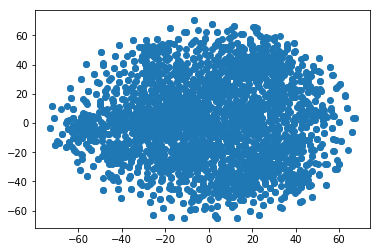

In [80]:
plt.plot(lsa_cv_sne[:, 0], lsa_cv_sne[:, 1],'o')

In [81]:
from sklearn.metrics import silhouette_score

inertia = [0,0]

for n_clusters in range(2, 25):
    km = KMeans(n_clusters = n_clusters)
    km.fit(lsa_cv_data)
    msg = f"""# clusters: {n_clusters:2d}   Inertia: {km.inertia_:8.6f}"""
    inertia.append(km.inertia_)
    print(msg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters:  2   Inertia: 36017.234563


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters:  3   Inertia: 35053.874541


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters:  4   Inertia: 34305.513863


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters:  5   Inertia: 33590.317336


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters:  6   Inertia: 32983.178744


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters:  7   Inertia: 32364.429811


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters:  8   Inertia: 31786.861677


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters:  9   Inertia: 31361.853349


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 10   Inertia: 30734.814912


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 11   Inertia: 30504.724563


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 12   Inertia: 30042.135626


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 13   Inertia: 30047.581864


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 14   Inertia: 29336.456806


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 15   Inertia: 29074.273600


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 16   Inertia: 29091.303412


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=17, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 17   Inertia: 28522.928318


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=18, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 18   Inertia: 28342.249937


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=19, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 19   Inertia: 28041.135870


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 20   Inertia: 27794.696559


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=21, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 21   Inertia: 27386.842054


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 22   Inertia: 27183.599114


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=23, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 23   Inertia: 27238.218091


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=24, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# clusters: 24   Inertia: 26813.810272


(2, 25)

(50000, 400000)

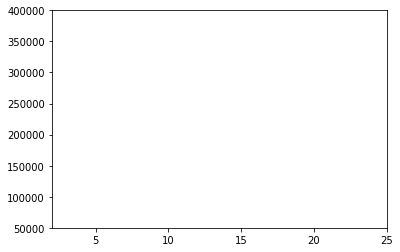

In [83]:
plt.plot(inertia)
plt.xlim((2,25))
plt.ylim((50000,400000))

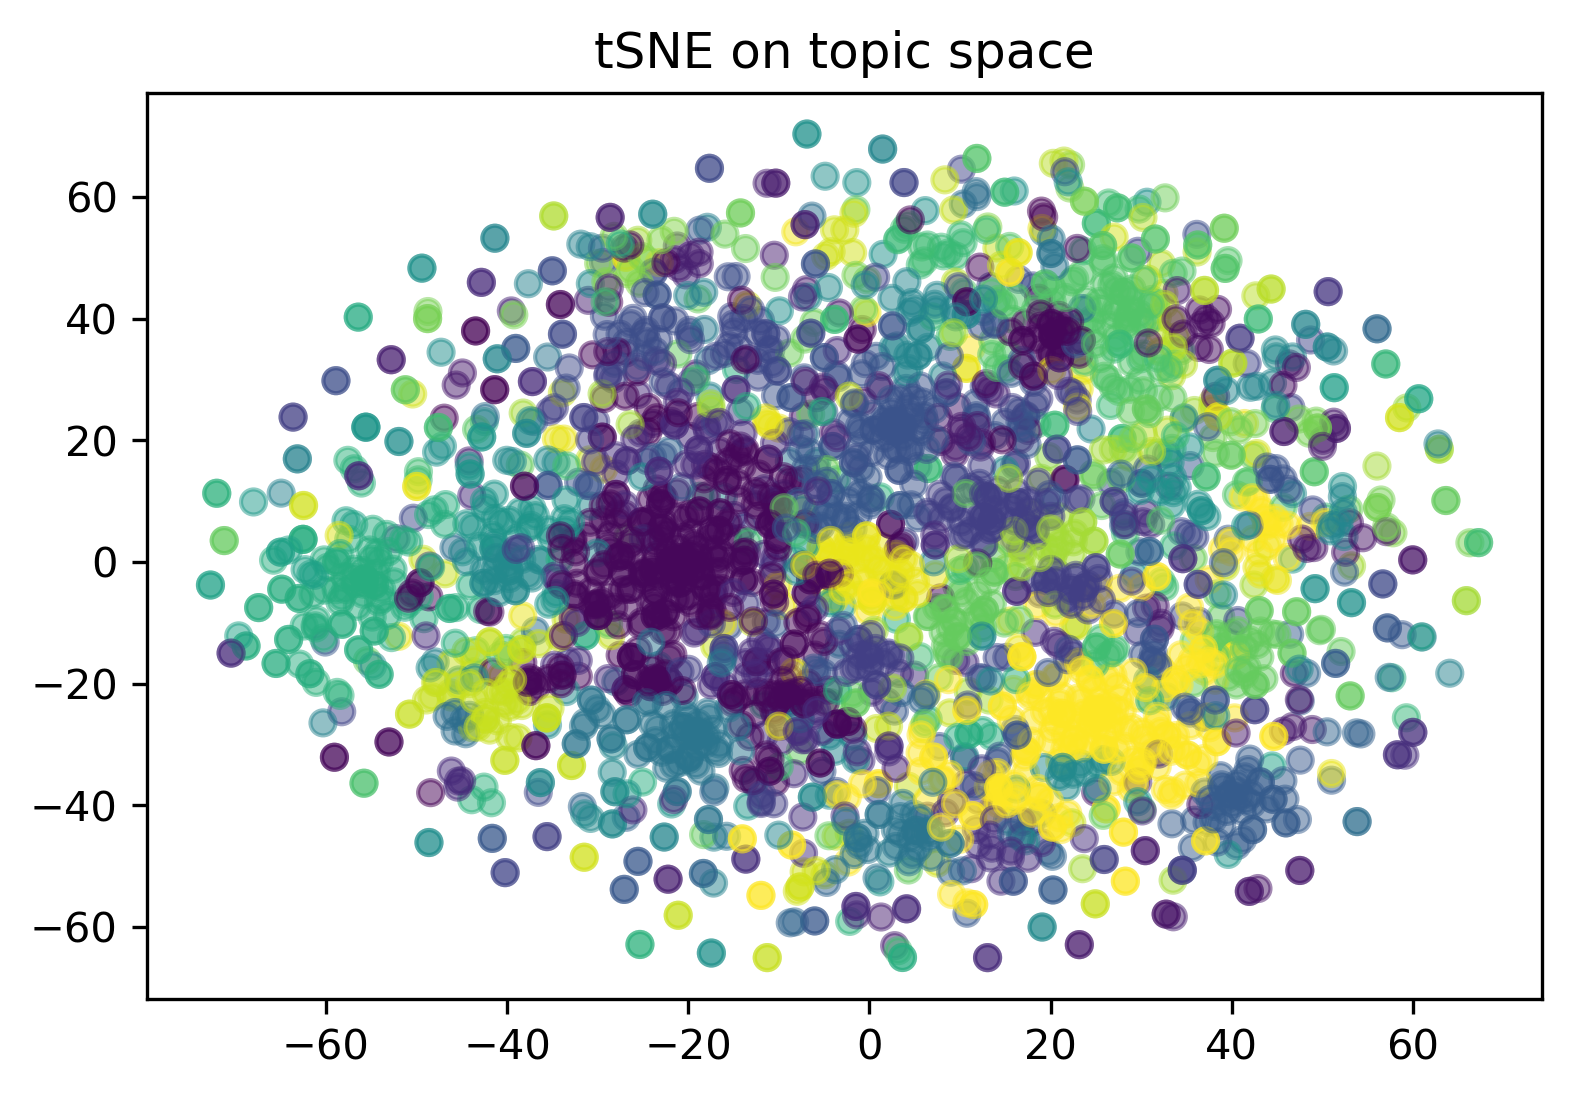

In [84]:
plt.figure(dpi=300)

n_clusters = 60
km = KMeans(n_clusters = n_clusters)
km.fit(lsa_cv_data)
    
plt.scatter(lsa_cv_sne[:, 0], lsa_cv_sne[:, 1],c=km.labels_, alpha=0.5)
plt.title('tSNE on topic space');

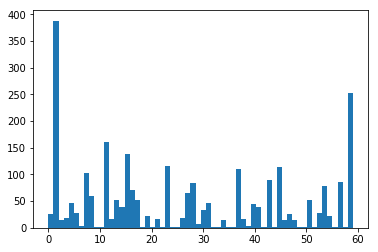

In [85]:
plt.hist(km.labels_, bins=n_clusters);

# Repeating with Modifiable Pipeline

if i want to do clustering, i will need to do a lot more trail and errors to find out reasonable clusters by putting less or more dimension into my clusters. then use tsne and print out the top few documents that are the closer to my cluster centroids to try to understand if those clusters make sense. this is where he wants me to build a pipeline/function to allow me easier to turn my parameters, models, clusters, tsne visualization, and print out documents for checking.

In [70]:
from sklearn.pipeline import Pipeline

In [ ]:
Pipeline([])

# Identifying Most Reasonable Cluster

# Employing Said Cluster

# Checking What Meaningful Things (if any) I can get from Clusters

## Intra-Cluster Star Variation

## Intra-Cluster Helpfulness Variation